In [2]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-06-24 12:12:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.27, 172.217.7.59, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   154MB/s    in 0.7s    

2024-06-24 12:12:04 (154 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath} '.")

There are 2 directories and 0 images in 'pizza_steak '.
There are 2 directories and 0 images in 'pizza_steak/train '.
There are 0 directories and 750 images in 'pizza_steak/train/steak '.
There are 0 directories and 750 images in 'pizza_steak/train/pizza '.
There are 2 directories and 0 images in 'pizza_steak/test '.
There are 0 directories and 250 images in 'pizza_steak/test/steak '.
There are 0 directories and 250 images in 'pizza_steak/test/pizza '.


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image Shape:  {img.shape}")
  return img

Image Shape:  (341, 512, 3)


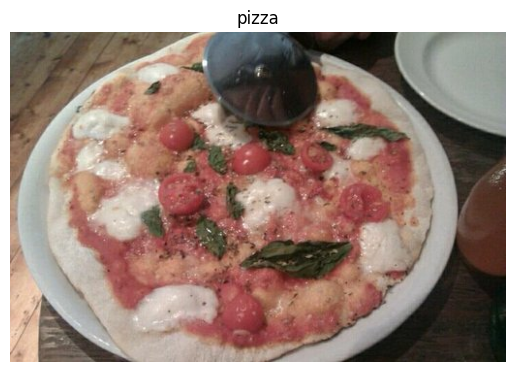

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img / 255.

array([[[0.29803922, 0.28627451, 0.26666667],
        [0.30588235, 0.29411765, 0.2745098 ],
        [0.31372549, 0.30196078, 0.28235294],
        ...,
        [0.03529412, 0.03137255, 0.01176471],
        [0.03137255, 0.03529412, 0.01176471],
        [0.03137255, 0.03529412, 0.01176471]],

       [[0.30980392, 0.29803922, 0.27843137],
        [0.31372549, 0.30196078, 0.28235294],
        [0.3254902 , 0.31372549, 0.29411765],
        ...,
        [0.02745098, 0.02352941, 0.00392157],
        [0.02352941, 0.02745098, 0.00392157],
        [0.01960784, 0.02352941, 0.        ]],

       [[0.30980392, 0.29803922, 0.27843137],
        [0.31764706, 0.30588235, 0.28627451],
        [0.3254902 , 0.31372549, 0.29411765],
        ...,
        [0.02352941, 0.01960784, 0.        ],
        [0.01960784, 0.01960784, 0.        ],
        [0.01568627, 0.01568627, 0.        ]],

       ...,

       [[0.43529412, 0.41960784, 0.38431373],
        [0.43529412, 0.41960784, 0.38431373],
        [0.43921569, 0

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data

In [ ]:
model_1  = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=30,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")

])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


In [ ]:
model_1.summary()

Model: "sequential"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 222, 222, 30)      840       

                                                                 

 conv2d_1 (Conv2D)           (None, 220, 220, 10)      2710      

                                                                 

 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         

 D)                                                              

                                                                 

 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       

                                                                 

 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       

                                                                 

 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         

 g2D)                                   

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')


])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5

47/47 [==============================] - 11s 184ms/step - loss: 0.7162 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5000

Epoch 2/5

47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000

Epoch 3/5

47/47 [==============================] - 10s 208ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000

Epoch 4/5

47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000

Epoch 5/5

47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.4800 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')


])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5

47/47 [==============================] - 25s 503ms/step - loss: 4.6676 - accuracy: 0.5693 - val_loss: 0.7025 - val_accuracy: 0.6800

Epoch 2/5

47/47 [==============================] - 22s 465ms/step - loss: 0.8723 - accuracy: 0.6787 - val_loss: 0.8845 - val_accuracy: 0.5800

Epoch 3/5

47/47 [==============================] - 23s 488ms/step - loss: 0.6134 - accuracy: 0.7220 - val_loss: 0.4688 - val_accuracy: 0.7640

Epoch 4/5

47/47 [==============================] - 26s 550ms/step - loss: 0.5064 - accuracy: 0.7640 - val_loss: 0.4461 - val_accuracy: 0.7780

Epoch 5/5

47/47 [==============================] - 22s 459ms/step - loss: 0.4517 - accuracy: 0.7767 - val_loss: 0.5200 - val_accuracy: 0.7320


In [ ]:
model_3.summary()

Model: "sequential_3"

_________________________________________________________________

 Layer (type)                Output Shape              Param #   


 flatten_2 (Flatten)         (None, 150528)            0         

                                                                 

 dense_8 (Dense)             (None, 100)               15052900  

                                                                 

 dense_9 (Dense)             (None, 100)               10100     

                                                                 

 dense_10 (Dense)            (None, 100)               10100     

                                                                 

 dense_11 (Dense)            (None, 1)                 101       

                                                                 


Total params: 15073201 (57.50 MB)

Trainable params: 15073201 (57.50 MB)

Non-trainable params: 0 (0.00 Byte)

____________________________________________________________

In [ ]:
15073201/31000

486.23229032258064

In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(f"Validation Data: {train_data}")

Validation Data: <keras.src.preprocessing.image.DirectoryIterator object at 0x7abd244b90f0>


In [ ]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )


Epoch 1/5
47/47 [==============================] - 120s 2s/step - loss: 0.0312 - accuracy: 0.9960 - val_loss: 0.5255 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 108s 2s/step - loss: 0.0109 - accuracy: 0.9993 - val_loss: 0.6014 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 108s 2s/step - loss: 0.0135 - accuracy: 0.9987 - val_loss: 0.6428 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 108s 2s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.6781 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 109s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6776 - val_accuracy: 0.8040


<Axes: >

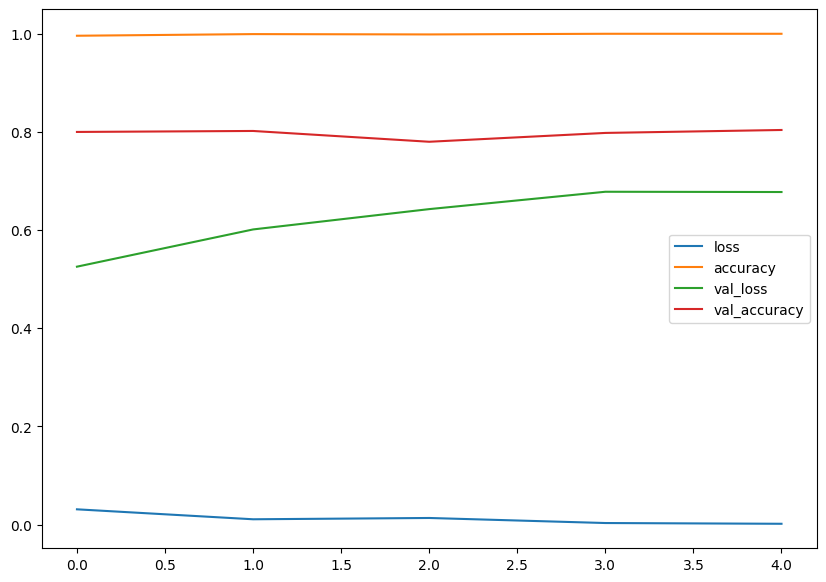

In [ ]:
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [3]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))
    plt.plot(epochs, loss, label="training lose")
    plt.plot(epochs, val_loss, label="validation loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.figure()
    plt.plot(epochs, accuracy, label="training accuracy")
    plt.plot(epochs, val_accuracy, label="validation accuracy")
    plt.title("Accuracy")
    plt.xlabel("epochs")
    plt.legend()

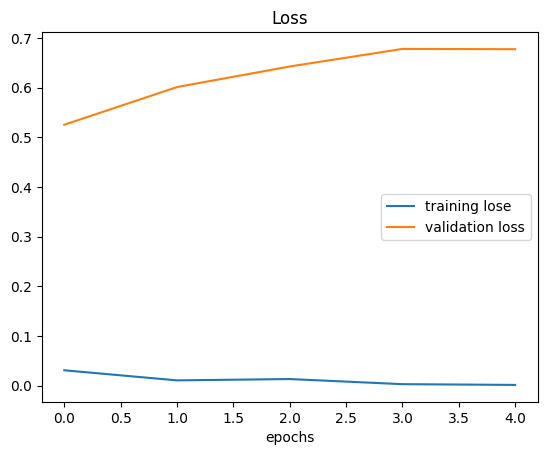

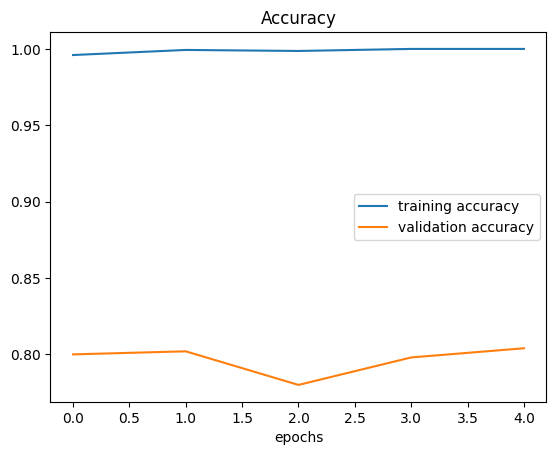

In [ ]:
plot_loss_curves(history_4)

validation loss is increasing means that our model is overfitting

ADDING REGULARIZATION TO REDUCE OVERFITTING

In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 52s 1s/step - loss: 0.5612 - accuracy: 0.7240 - val_loss: 0.4258 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 53s 1s/step - loss: 0.4418 - accuracy: 0.8067 - val_loss: 0.3854 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 52s 1s/step - loss: 0.4118 - accuracy: 0.8227 - val_loss: 0.3682 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 55s 1s/step - loss: 0.3880 - accuracy: 0.8327 - val_loss: 0.4302 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 51s 1s/step - loss: 0.3771 - accuracy: 0.8527 - val_loss: 0.3492 - val_accuracy: 0.8500


In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 10)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 10)        0

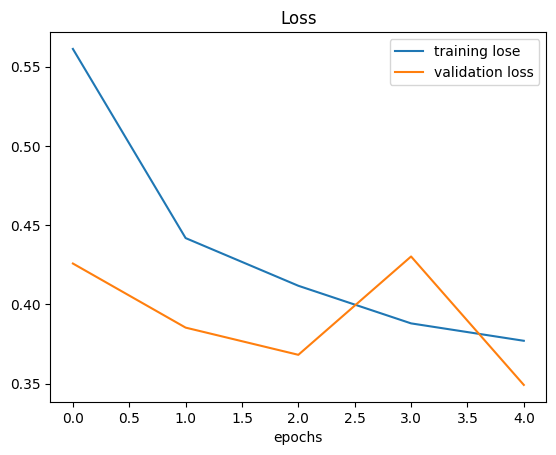

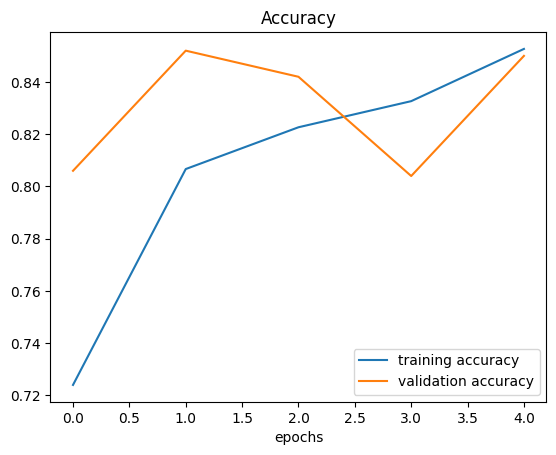

In [ ]:
plot_loss_curves(history_5)

opening our bag of tricks and finding data augmentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          horizontal_flip=True)


train_datagen = ImageDataGenerator(rescale=1/255.)


test_datagen = ImageDataGenerator(rescale=1/255.)


In [ ]:
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=False)

print("Non augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

print("Non augmented test data")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')



Augmented training data
Found 1500 images belonging to 2 classes.
Non augmented training data
Found 1500 images belonging to 2 classes.
Non augmented test data
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Image number: 1


(-0.5, 223.5, 223.5, -0.5)

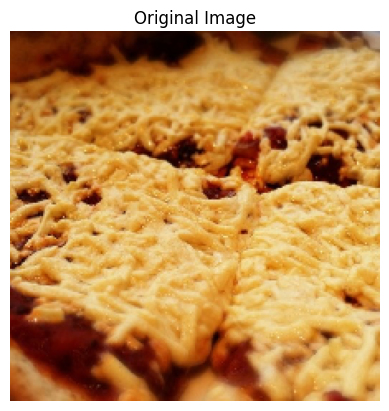

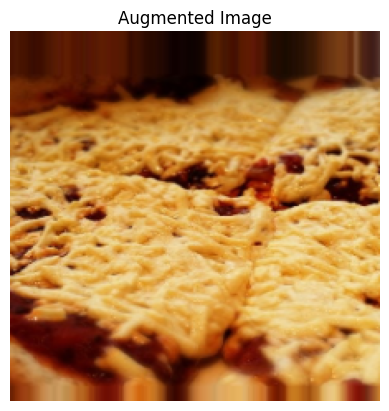

In [ ]:
import random

random_num = random.randint(0, 31)
print(f"Image number: {random_num}")
plt.imshow(images[random_num])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_num])
plt.title("Augmented Image")
plt.axis(False)


In [ ]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3),),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 74s 2s/step - loss: 0.7356 - accuracy: 0.4920 - val_loss: 0.6869 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 67s 1s/step - loss: 0.6882 - accuracy: 0.5093 - val_loss: 0.6729 - val_accuracy: 0.5880
Epoch 3/5
47/47 [==============================] - 65s 1s/step - loss: 0.6782 - accuracy: 0.5927 - val_loss: 0.6286 - val_accuracy: 0.6640
Epoch 4/5
47/47 [==============================] - 65s 1s/step - loss: 0.6985 - accuracy: 0.5853 - val_loss: 0.6711 - val_accuracy: 0.6880
Epoch 5/5
47/47 [==============================] - 67s 1s/step - loss: 0.6427 - accuracy: 0.6787 - val_loss: 0.6011 - val_accuracy: 0.5940


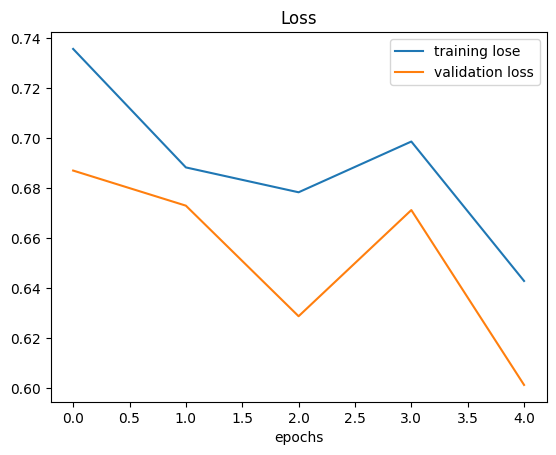

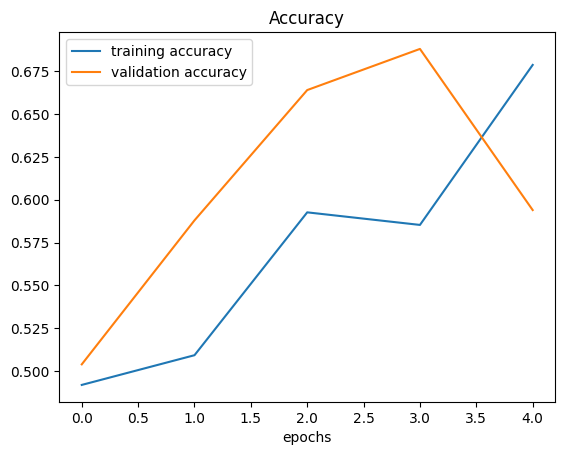

In [ ]:
plot_loss_curves(history_6)

lets shuffle now the augmented data and see what happens

In [ ]:
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=True)


Found 1500 images belonging to 2 classes.


In [17]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1, activation='sigmoid')
])


model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 70s 1s/step - loss: 0.6575 - accuracy: 0.6060 - val_loss: 0.5537 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 69s 1s/step - loss: 0.5347 - accuracy: 0.7333 - val_loss: 0.3869 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 68s 1s/step - loss: 0.4952 - accuracy: 0.7653 - val_loss: 0.3536 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 68s 1s/step - loss: 0.4702 - accuracy: 0.7847 - val_loss: 0.3954 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 68s 1s/step - loss: 0.4483 - accuracy: 0.7953 - val_loss: 0.3692 - val_accuracy: 0.8380


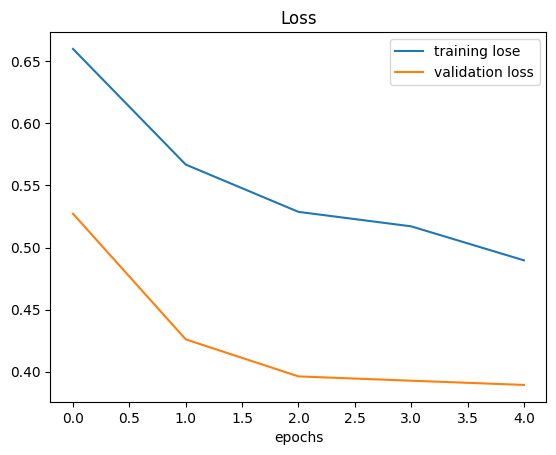

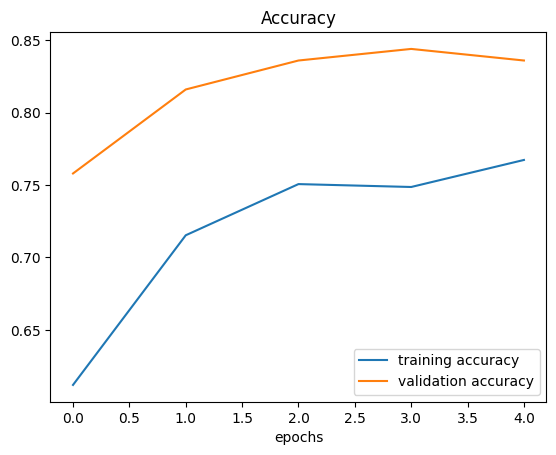

In [ ]:
plot_loss_curves(history_7)

In [ ]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2024-06-23 12:20:16--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg           [ <=>                ] 254.22K  --.-KB/s    in 0.1s    

2024-06-23 12:20:17 (2.50 MB/s) - ‘03-steak.jpeg’ saved [260323]



In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2024-06-23 12:20:20--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2024-06-23 12:20:20 (26.5 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

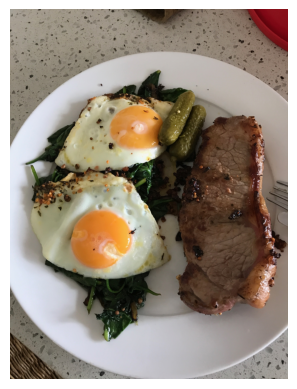

In [ ]:
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg.1")
plt.imshow(steak)
plt.axis(False)


In [ ]:
steak.shape

(4032, 3024, 3)

In [30]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img



In [23]:
steak = load_and_prep_image("03-steak.jpeg.1")
steak


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [27]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 50ms/step


In [28]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [27]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 30ms/step


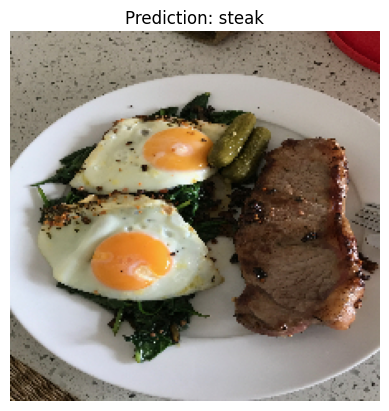

In [33]:
pred_and_plot(model_7, "03-steak.jpeg.1")

--2024-06-23 12:55:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2024-06-23 12:55:29 (35.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 85ms/step


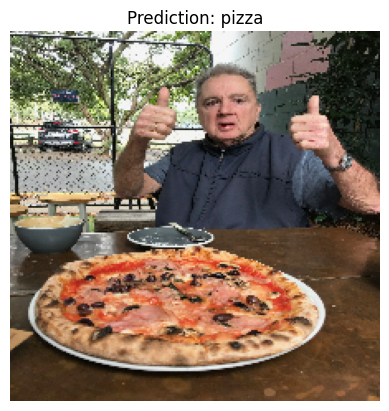

In [34]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

pred_and_plot(model_7, "03-pizza-dad.jpeg")

MULTI CLASS IMAGE CLASSIFICATION

1. become one with the data
2. preprocess the data (get it ready for a model)
3. create a model (start with baseline)
4. fit the model (overfit it to make sure it works)
5. evaluate the model
6. adjust different hyperparameters and improve the model (try to beat baseline reduce overfitting)
7. repear until satisfied

In [4]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-06-24 12:12:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.59, 172.217.12.27, 172.217.15.251, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   146MB/s    in 3.4s    

2024-06-24 12:12:38 (146 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [10]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [5]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [6]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image Shape:  (384, 512, 3)


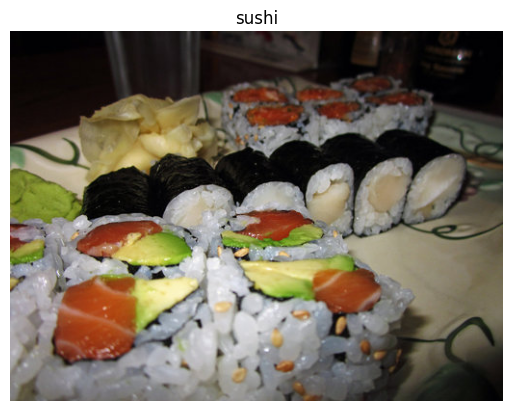

In [11]:
import random

vie_img = view_random_image(target_dir=train_dir,
                            target_class=random.choice(class_names))


In [14]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [15]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [22]:
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])


model_8.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [52]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
235/235 [==============================] - 520s 2s/step - loss: 2.2128 - accuracy: 0.1853 - val_loss: 2.1162 - val_accuracy: 0.2280
Epoch 2/5
235/235 [==============================] - 523s 2s/step - loss: 1.9756 - accuracy: 0.3084 - val_loss: 1.9148 - val_accuracy: 0.3268
Epoch 3/5
235/235 [==============================] - 526s 2s/step - loss: 1.5808 - accuracy: 0.4665 - val_loss: 1.9871 - val_accuracy: 0.3232
Epoch 4/5
235/235 [==============================] - 551s 2s/step - loss: 0.9703 - accuracy: 0.6868 - val_loss: 2.5811 - val_accuracy: 0.2888
Epoch 5/5
235/235 [==============================] - 521s 2s/step - loss: 0.4009 - accuracy: 0.8729 - val_loss: 3.5203 - val_accuracy: 0.2748


In [53]:
model_8.evaluate(test_data)

79/79 [==============================] - 59s 748ms/step - loss: 3.5203 - accuracy: 0.2748


[3.520334482192993, 0.27480000257492065]

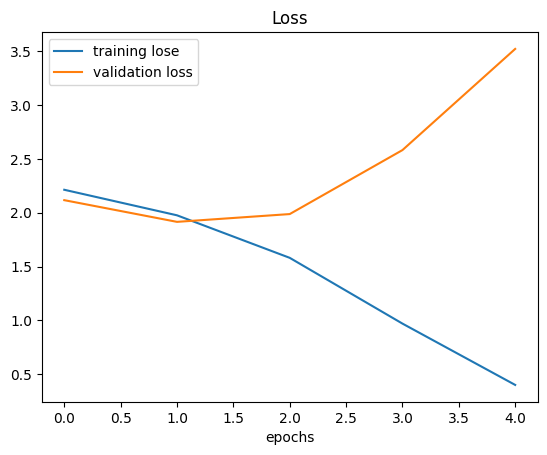

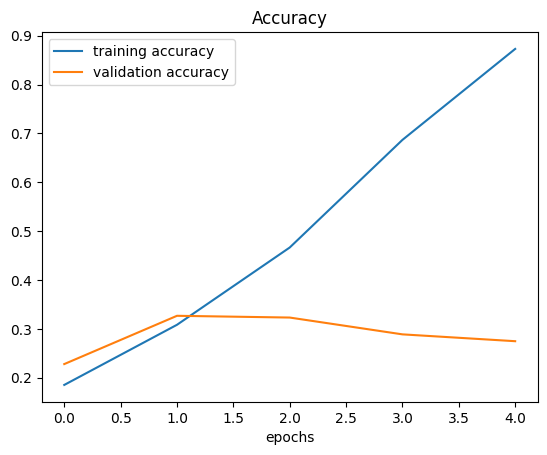

In [56]:
plot_loss_curves(history_8)

In [18]:
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 295s 1s/step - loss: 2.1642 - accuracy: 0.2129 - val_loss: 2.0008 - val_accuracy: 0.2932
Epoch 2/5
235/235 [==============================] - 260s 1s/step - loss: 1.8456 - accuracy: 0.3689 - val_loss: 1.9975 - val_accuracy: 0.3004
Epoch 3/5
235/235 [==============================] - 262s 1s/step - loss: 1.4044 - accuracy: 0.5401 - val_loss: 2.1383 - val_accuracy: 0.3068
Epoch 4/5
235/235 [==============================] - 220s 936ms/step - loss: 0.8666 - accuracy: 0.7280 - val_loss: 2.4094 - val_accuracy: 0.2904
Epoch 5/5
235/235 [==============================] - 227s 965ms/step - loss: 0.4529 - accuracy: 0.8731 - val_loss: 2.8525 - val_accuracy: 0.2720


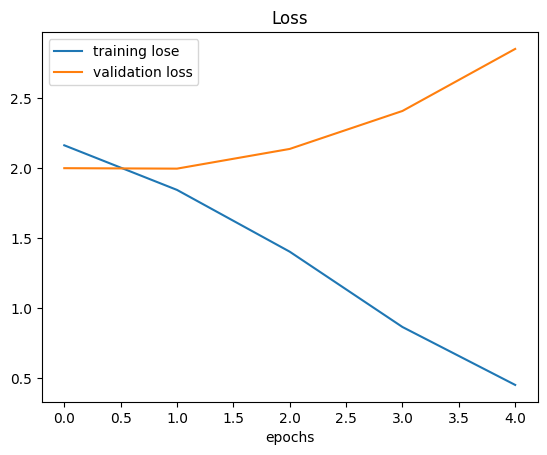

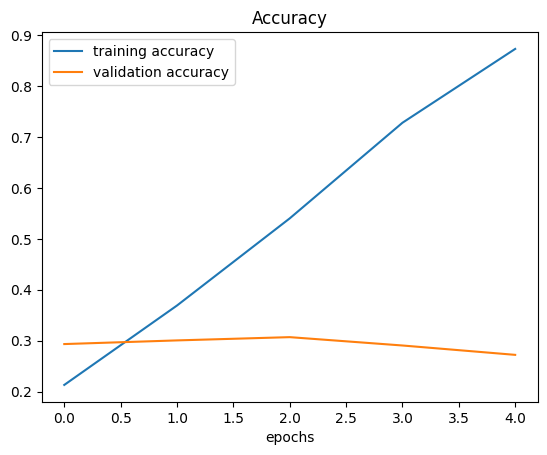

In [19]:
plot_loss_curves(history_9)

Simplifying the model did not work as we expected so now we are going to augment tha data

In [20]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True
                                   )

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode='categorical'
                                                                  )



Found 7500 images belonging to 10 classes.


In [24]:
model_10 = tf.keras.models.clone_model(model_8)
model_10.compile(loss='categorical_crossentropy',
                 optimizer=Adam(),
                 metrics=['accuracy'])
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data)
                         )

Epoch 1/5
235/235 [==============================] - 573s 2s/step - loss: 2.1706 - accuracy: 0.2065 - val_loss: 1.9501 - val_accuracy: 0.3152
Epoch 2/5
235/235 [==============================] - 532s 2s/step - loss: 2.0403 - accuracy: 0.2737 - val_loss: 1.9624 - val_accuracy: 0.2980
Epoch 3/5
235/235 [==============================] - 528s 2s/step - loss: 1.9763 - accuracy: 0.3067 - val_loss: 1.8605 - val_accuracy: 0.3684
Epoch 4/5
235/235 [==============================] - 528s 2s/step - loss: 1.9476 - accuracy: 0.3209 - val_loss: 1.8001 - val_accuracy: 0.3956
Epoch 5/5
235/235 [==============================] - 513s 2s/step - loss: 1.8931 - accuracy: 0.3395 - val_loss: 1.7450 - val_accuracy: 0.4084


In [40]:
model_10.evaluate(test_data)

79/79 [==============================] - 44s 554ms/step - loss: 1.7450 - accuracy: 0.4084


[1.745048999786377, 0.4083999991416931]

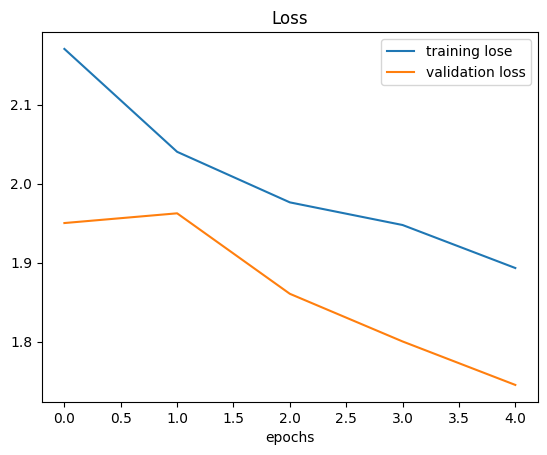

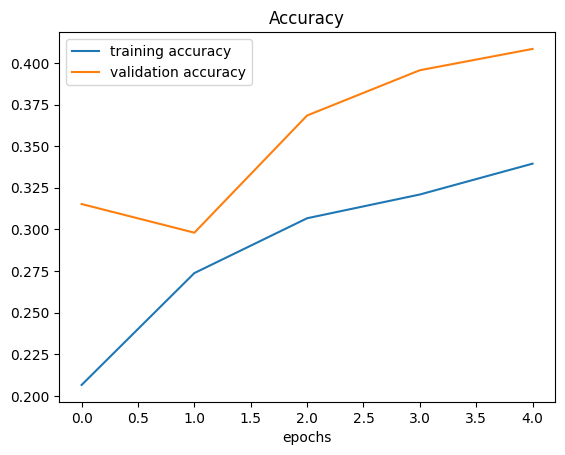

In [28]:
plot_loss_curves(history_10)

Repeat until satisfied
By running a lot of experiments
namely
1. restructing our model's architecture
2. adjust the learning rate
3. try different methods of data augmentation
4. training for longer
5. try **transfer learning**

MAKING PREDICTION WITH OUR TRAINED MODEL

In [25]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [26]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2024-06-24 13:54:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.09s   

2024-06-24 13:54:34 (20.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

--2024-06-24 13:54:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response...

In [36]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 35ms/step


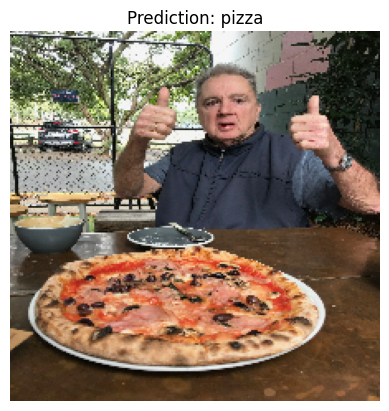

In [37]:
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=list(class_names))

1/1 [==============================] - 0s 33ms/step


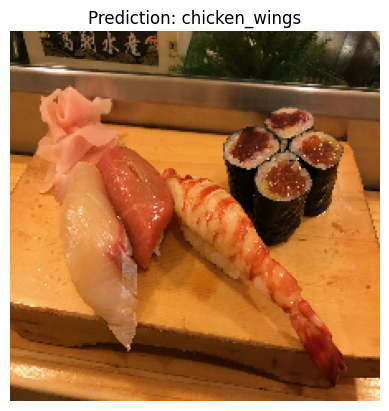

In [38]:
  pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=list(class_names))

1/1 [==============================] - 0s 34ms/step


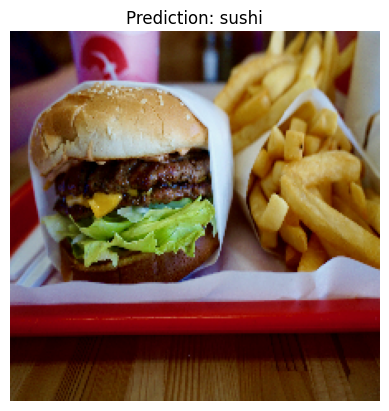

In [39]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=list(class_names))

In [42]:
model_10.save("saved_trained_model_10")

In [43]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 44s 552ms/step - loss: 1.7450 - accuracy: 0.4084


[1.7450495958328247, 0.4083999991416931]